# Match stars in the Tycho-2 - Gaia catalog (TGAS)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
import sys
sys.path.append('../src')
import P_posterior
import P_random
import P_binary
import parallax
import const as c
import corner
import time
import pickle

%matplotlib inline

In [3]:
# Read in sample from TGAS table
dtype = [('ID','<i8'),('tyc','S11'),('hip','<i8'),('ra','<f8'),('dec','<f8'),('mu_ra','<f8'),('mu_dec','<f8'), \
     ('mu_ra_err','<f8'),('mu_dec_err','<f8'),('plx','<f8'),('plx_err','<f8')]

tgas_full = np.array([], dtype=dtype)

#for i in np.arange(1):
for i in np.arange(16):
    if i < 10:
        filename = ('../data/TGAS/TgasSource_000-000-00' + str(i) + '.csv')
    else:
        filename = ('../data/TGAS/TgasSource_000-000-0' + str(i) + '.csv')

    print filename
    tgas_tmp = Table.read(filename, format='csv', guess=True)
    
    

    tgas = np.zeros(len(tgas_tmp), dtype=dtype)

    tgas['ID'] = tgas_tmp['source_id']
    tgas['tyc'] = tgas_tmp['tycho2_id']
    tgas['hip'] = tgas_tmp['hip']
    tgas['ra'] = tgas_tmp['ra']
    tgas['dec'] = tgas_tmp['dec']
    tgas['mu_ra'] = tgas_tmp['pmra']
    tgas['mu_ra_err'] = tgas_tmp['pmra_error']
    tgas['mu_dec'] = tgas_tmp['pmdec']
    tgas['mu_dec_err'] = tgas_tmp['pmdec_error']
    tgas['plx'] = tgas_tmp['parallax']
    tgas['plx_err'] = tgas_tmp['parallax_error']

    tgas_full = np.append(tgas_full, tgas)


../data/TGAS/TgasSource_000-000-000.csv
../data/TGAS/TgasSource_000-000-001.csv
../data/TGAS/TgasSource_000-000-002.csv
../data/TGAS/TgasSource_000-000-003.csv
../data/TGAS/TgasSource_000-000-004.csv
../data/TGAS/TgasSource_000-000-005.csv
../data/TGAS/TgasSource_000-000-006.csv
../data/TGAS/TgasSource_000-000-007.csv
../data/TGAS/TgasSource_000-000-008.csv
../data/TGAS/TgasSource_000-000-009.csv
../data/TGAS/TgasSource_000-000-010.csv
../data/TGAS/TgasSource_000-000-011.csv
../data/TGAS/TgasSource_000-000-012.csv
../data/TGAS/TgasSource_000-000-013.csv
../data/TGAS/TgasSource_000-000-014.csv
../data/TGAS/TgasSource_000-000-015.csv


In [62]:
pairs1 = pickle.load(open('../data/TGAS/TGAS_match_78.p', 'rb'))
pairs2 = pickle.load(open('../data/TGAS/TGAS_match_77.p', 'rb'))
pairs3 = pickle.load(open('../data/TGAS/TGAS_match_55.p', 'rb'))
pairs4 = pickle.load(open('../data/TGAS/TGAS_match_61.p', 'rb'))

pairs_all = np.array([], dtype=pairs1.dtype)

pairs_all = np.append(pairs_all, pairs1)
pairs_all = np.append(pairs_all, pairs2)
pairs_all = np.append(pairs_all, pairs3)

print len(pairs1), len(pairs2), len(pairs3)
print len(pairs_all)

222 256 1230
1708


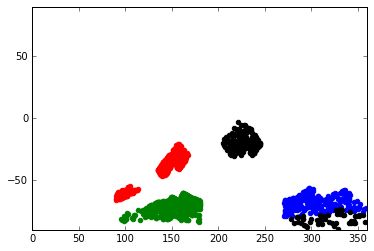

In [63]:
plt.scatter(tgas_full['ra'][pairs1['i_1']], tgas_full['dec'][pairs1['i_1']], color='b')
plt.scatter(tgas_full['ra'][pairs2['i_1']], tgas_full['dec'][pairs2['i_1']], color='k')
plt.scatter(tgas_full['ra'][pairs3['i_1']], tgas_full['dec'][pairs3['i_1']], color='g')
plt.scatter(tgas_full['ra'][pairs4['i_1']], tgas_full['dec'][pairs4['i_1']], color='r')

plt.xlim(0,360)
plt.ylim(-90,90)

plt.show()

In [69]:
dtype = [('TYC_1','S11'),('TYC_2','S11'),('ra_1','<f8'),('dec_1','<f8'),('ra_2','<f8'),('dec_2','<f8'),('P_posterior','<f8')]
pairs_out = np.zeros(len(pairs_all), dtype=dtype)


for i, pair in zip(np.arange(len(pairs_all)), pairs_all):

    pairs_out[i]['TYC_1'] = tgas_full['tyc'][pair['i_1']]
    pairs_out[i]['TYC_2'] = tgas_full['tyc'][pair['i_2']]
    pairs_out[i]['ra_1'] = tgas_full['ra'][pair['i_1']]
    pairs_out[i]['dec_1'] = tgas_full['dec'][pair['i_1']]
    pairs_out[i]['ra_2'] = tgas_full['ra'][pair['i_2']]
    pairs_out[i]['dec_2'] = tgas_full['dec'][pair['i_2']]
    pairs_out[i]['P_posterior'] = pair['P_posterior']


In [81]:
# Save sample pairs to file

pairs_out_good = pairs_out[np.where(pairs_out['P_posterior']>0.01)]

header = "TYC_1 TYC_2 ra_1 dec_1 ra_2 dec_2 P_posterior"
fmt = '%s %s %f %f %f %f %f'
np.savetxt('pairs_sample.txt', pairs_out_good, fmt=fmt, header=header)